Bu bölümde neler öğrendim:
* bir veri kümesini test ve train olarak ikiye ayırmayı ve özelliklerin yer aldığı x_train ve x_test veri kümelerini tahmin ederek hataların görselleştirilmesini.
* tahmin sonuçlarının performansını incelemek için mae,mse,rmse,mape değerlerini yorumlamayı

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse,rmse

# Soru 1:
* Load the houseprices data from Kaggle
* Split your data into train and test sets.
* Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.
* Predict the house prices in the test set and evaluate the performance of your model using the metrics we mentioned in this checkpoint.
* Is the performance of your model satisfactory? Why?
* Try to improve your model in terms of prediction performance by adding or removing some variables.

In [2]:
train=pd.read_csv("train.csv")

display(train.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.drop("Id", axis=1, inplace=True)
train.drop("LotFrontage",axis=1,inplace=True)
train.drop("Alley",axis=1,inplace=True)
train.drop("FireplaceQu",axis=1,inplace=True)
train.drop("PoolQC",axis=1,inplace=True)
train.drop("Fence",axis=1,inplace=True)
train.drop("MiscFeature",axis=1,inplace=True)

In [4]:
train["GarageCond"].fillna(train["GarageCond"].mode()[0],inplace=True)
train["MasVnrArea"].fillna(train["MasVnrArea"].mode()[0],inplace=True)
train["GarageQual"].fillna(train["GarageQual"].mode()[0], inplace=True)
train["GarageFinish"].fillna(train["GarageFinish"].mode()[0], inplace=True)
train["GarageYrBlt"].fillna(train["GarageYrBlt"].mode()[0], inplace=True)
train["GarageType"].fillna(train["GarageType"].mode()[0], inplace=True)
train["Electrical"].fillna(train["Electrical"].mode()[0], inplace=True)
train["BsmtFinType2"].fillna(train["BsmtFinType2"].mode()[0], inplace=True)
train["BsmtFinType1"].fillna(train["BsmtFinType1"].mode()[0], inplace=True)
train["BsmtQual"].fillna(train["BsmtQual"].mode()[0], inplace=True)
train["BsmtCond"].fillna(train["BsmtCond"].mode()[0], inplace=True)
train["BsmtExposure"].fillna(train["BsmtExposure"].mode()[0], inplace=True)
train["MasVnrType"].fillna(train["MasVnrType"].mode()[0], inplace=True)

In [5]:
train["MiscVal"].replace(0,"none",inplace=True)
train["PoolArea"].replace(0,"none",inplace=True)
train["ScreenPorch"].replace(0,"none",inplace=True)
train["3SsnPorch"].replace(0,"none",inplace=True)
train["EnclosedPorch"].replace(0,"none",inplace=True)
train["OpenPorchSF"].replace(0,"none",inplace=True)
train["WoodDeckSF"].replace(0,"none",inplace=True)
train["LowQualFinSF"].replace(0,"none",inplace=True)
train["BsmtFinSF2"].replace(0,"none",inplace=True)

In [7]:
def paved(PavedDrive):
    if PavedDrive=="Y":
        return 3
    elif PavedDrive=="P":
        return 2
    elif PavedDrive=="N":
        return 1

train["PavedDrive_new"]=train["PavedDrive"].apply(paved)

In [8]:
def garagequal(GarageQual):
    if GarageQual=="Ex":
        return 5
    elif GarageQual=="Gd":
        return 4
    elif GarageQual=="TA":
        return 3
    elif GarageQual=="Fa":
        return 2
    elif GarageQual=="Po":
        return 1
    
train["GarageQual_new"]=train["GarageQual"].apply(garagequal)

In [9]:
def garagefinish(GarageFinish):
    if GarageFinish=="Fin":
        return 3
    elif GarageFinish=="RFn":
        return 2
    elif GarageFinish=="Unf":
        return 1

train["GarageFinish_new"]=train["GarageFinish"].apply(garagefinish)

In [10]:
def kitchenqual(KitchenQual):
    if KitchenQual=="Ex":
        return 4
    elif KitchenQual=="Gd":
        return 3
    elif KitchenQual=="TA":
        return 2
    elif KitchenQual=="Fa":
        return 1

train["KitchenQual_new"]=train["KitchenQual"].apply(kitchenqual)

In [11]:
# dummy değişken oluşturma

train["CentralAir_new"]=train["CentralAir"].replace({"Y":1, "N":0})

In [12]:
def extercon(ExterCond):
    if ExterCond=="Ex":
        return 5
    elif ExterCond=="Gd":
        return 4
    elif ExterCond=="TA":
        return 3
    elif ExterCond=="Fa":
        return 2
    elif ExterCond=="Po":
        return 1
    
train["ExterCond_new"]=train["ExterCond"].apply(extercon)

In [13]:
train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,YrSold,SaleType,SaleCondition,SalePrice,PavedDrive_new,GarageQual_new,GarageFinish_new,KitchenQual_new,CentralAir_new,ExterCond_new
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2008,WD,Normal,208500,3,3,2,3,1,3
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,2007,WD,Normal,181500,3,3,2,2,1,3
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2008,WD,Normal,223500,3,3,2,3,1,3
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,2006,WD,Abnorml,140000,3,3,1,3,1,3
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,2008,WD,Normal,250000,3,3,2,3,1,3


In [15]:
Y=train["SalePrice"]
X=train[["GarageArea","GrLivArea","OverallQual","OverallCond","PavedDrive_new","GarageQual_new",
        "GarageFinish_new","KitchenQual_new","CentralAir_new","ExterCond_new"]]

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=465)

print("The number of observations in training set is: {}".format(X_train.shape[0]))
print("The number of observations in test set is: {}". format(X_test.shape[0]))

The number of observations in training set is: 1168
The number of observations in test set is: 292


In [20]:
X_train=sm.add_constant(X_train)

result=sm.OLS(Y_train,X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     387.3
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:20:14   Log-Likelihood:                -13955.
No. Observations:                1168   AIC:                         2.793e+04
Df Residuals:                    1157   BIC:                         2.799e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.392e+05   1.66e+04     -8.361      0.000   -1.72e+05   -1.07e+05
GarageArea          59.0504      6.624      8.915      0.000      46.055      72.046
GrLivArea           49.3890      2.666     18.523      0.000      44.157      54.621
OverallQual       1.928e+04   1317.096     14.639      0.000    1.67e+04    2.19e+04
OverallCond       2291.1544   1101.434      2.080      0.038     130.122    4452.187
PavedDrive_new    3724.8106   2437.865      1.528      0.127   -1058.321    8507.942
GarageQual_new    7921.1080   4493.535      1.763      0.078    -895.281    1.67e+04
GarageFinish_new  9421.4325   1672.293      5.634      0.000    6140.366    1.27e+04
KitchenQual_new   1.773e+04   2256.067      7.861      0.000    1.33e+04    2.22e+04
CentralAir_new    6106.1235   4866.584      1.255      0.210   -3442.195    1.57e+04
ExterCond_new    -4935.8925   3526.332     -1.400      0.162   -1.19e+04    1982.830
==============================================================================
Omnibus:                      305.751   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20320.984
Skew:                           0.088   Prob(JB):                         0.00
Kurtosis:                      23.433   Cond. No.                     2.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared değeri 0.770 çıktığı için, özellikler hedef değişkenin varyansını %77 oranında açıkladığını söylemektedir; ancak model hala iyileştirilebilir. Ayrıca, F-istatistiğinin p değeri 0.05'den küçük çıktığı için modelin tüm özellikleri hedef değişkeni açıklamada anlamlıdır denilebilir. Modeli iyileştirmek için özellik ekleyelim.

C:\Users\afran\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


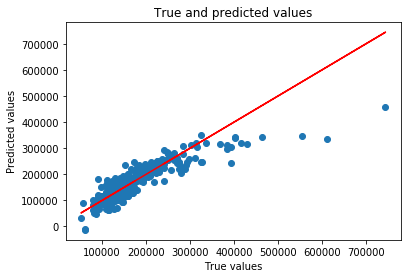

Mean absolute error of the prediction is: 27691.71997628662
Mean squared error of the prediction is: 1805354280.149859
Root mean squared error of the prediction is: 42489.46081265163
Mean absolute percentage error of the prediction is:16.059460114000448


In [40]:
X_test=sm.add_constant(X_test)

y_preds=result.predict(X_test)

plt.scatter(Y_test, y_preds)
plt.plot(Y_test,Y_test, color="r")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True and predicted values")

plt.show()


print("Mean absolute error of the prediction is: {}". format(mean_absolute_error(Y_test,y_preds)))
print("Mean squared error of the prediction is: {}". format(mse(Y_test, y_preds)))
print("Root mean squared error of the prediction is: {}". format(rmse(Y_test, y_preds)))
print("Mean absolute percentage error of the prediction is:{}". format(np.mean(np.abs((Y_test-y_preds)/Y_test))*100))

Model, düşük değerler için doğru tahmin yaparken, yüksek değerler için hatalı tahmin yapmıştır. Modelimizi geliştirmeye devam edelim.

In [25]:
Y2=train["SalePrice"]
X2=train[["GarageArea","GrLivArea","OverallQual","OverallCond","GarageFinish_new","KitchenQual_new","TotalBsmtSF"]]


In [26]:
X2_train, X2_test, Y2_train, Y2_test =train_test_split(X2,Y2, test_size=0.2, random_state=465 ) 

In [28]:
X2_train=sm.add_constant(X2_train)

result2=sm.OLS(Y2_train,X2_train).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     576.5
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:35:51   Log-Likelihood:                -13937.
No. Observations:                1168   AIC:                         2.789e+04
Df Residuals:                    1160   BIC:                         2.793e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.224e+05   7621.823    -16.066      0.000   -1.37e+05   -1.07e+05
GarageArea          52.6232      6.547      8.038      0.000      39.778      65.469
GrLivArea           45.2607      2.629     17.214      0.000      40.102      50.419
OverallQual        1.83e+04   1301.136     14.066      0.000    1.57e+04    2.09e+04
OverallCond       2863.1636    994.716      2.878      0.004     911.521    4814.806
GarageFinish_new  9715.4425   1627.719      5.969      0.000    6521.840    1.29e+04
KitchenQual_new   1.666e+04   2222.342      7.496      0.000    1.23e+04     2.1e+04
TotalBsmtSF         21.1100      3.092      6.827      0.000      15.043      27.177
==============================================================================
Omnibus:                      483.747   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54246.037
Skew:                          -0.901   Prob(JB):                         0.00
Kurtosis:                      36.338   Cond. No.                     1.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared değeri %0.7 artarak 0.777 olmuştur, yani önceki modelde açıklanmayan tahminler açıklanmıştır denilebilir ancak çok ilerleme yoktur. Görselleştirelim:

C:\Users\afran\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Mean absolute error of the prediction is: 25394.27770387887
Mean squared error of the prediction is: 1559892792.442576
Root mean squared error of the prediction is: 39495.47812652198
Mean absolute percentage error of the prediction is:14.864349936091193


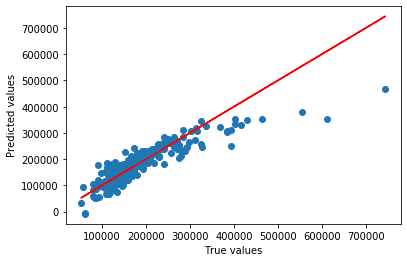

In [41]:
X2_test = sm.add_constant(X2_test)

y2_pred=result2.predict(X2_test)

plt.scatter(Y2_test,y2_pred)
plt.plot(Y2_test, Y2_test, color="r")
plt.xlabel("True values")
plt.ylabel("Predicted values");

print("Mean absolute error of the prediction is: {}". format(mean_absolute_error(Y2_test,y2_pred)))
print("Mean squared error of the prediction is: {}". format(mse(Y2_test, y2_pred)))
print("Root mean squared error of the prediction is: {}". format(rmse(Y2_test, y2_pred)))
print("Mean absolute percentage error of the prediction is:{}". format(np.mean(np.abs((Y2_test-y2_pred)/Y2_test))*100))

Görselde diğer modele nazaran düşük değerler için kırmızı çizginin çevresinde daha sıkı toplandığı görülmüştür, iyileştirmeye devam edelim:

In [31]:
Y3=train["SalePrice"]
X3=train[["GarageArea","GrLivArea","OverallQual","OverallCond","GarageFinish_new","KitchenQual_new","TotalBsmtSF","BsmtUnfSF"]]

In [32]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.2, random_state=465)

In [34]:
X3_train= sm.add_constant(X3_train)

result3= sm.OLS(Y3_train, X3_train).fit()

result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     517.1
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:44:12   Log-Likelihood:                -13926.
No. Observations:                1168   AIC:                         2.787e+04
Df Residuals:                    1159   BIC:                         2.791e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.213e+05   7553.155    -16.063      0.000   -1.36e+05   -1.07e+05
GarageArea          50.0362      6.507      7.690      0.000      37.269      62.803
GrLivArea           45.4237      2.605     17.440      0.000      40.314      50.534
OverallQual       1.931e+04   1305.553     14.789      0.000    1.67e+04    2.19e+04
OverallCond       2401.7981    989.905      2.426      0.015     459.593    4344.004
GarageFinish_new  8925.2132   1620.568      5.507      0.000    5745.638    1.21e+04
KitchenQual_new   1.672e+04   2201.302      7.594      0.000    1.24e+04     2.1e+04
TotalBsmtSF         25.8932      3.219      8.044      0.000      19.578      32.209
BsmtUnfSF          -12.9966      2.691     -4.829      0.000     -18.277      -7.716
==============================================================================
Omnibus:                      603.646   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81995.336
Skew:                          -1.349   Prob(JB):                         0.00
Kurtosis:                      43.958   Cond. No.                     1.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Yeni özellik ekleme ile modelin R-squared değeri ile F-istatistiği artmıştır. Tahmin ederek görselleştirelim:

C:\Users\afran\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Mean absolute error of the prediction is: 24463.541530699847
Mean squared error of the prediction is: 1439611538.4504337
Root mean squared error of the prediction is: 37942.21314644724
Mean absolute percentage error of the prediction is:14.402848628892093


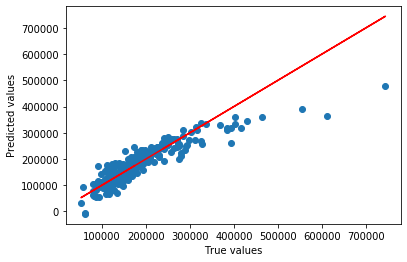

In [42]:
X3_test= sm.add_constant(X3_test)

y3_pred= result3.predict(X3_test)

plt.scatter(Y3_test, y3_pred)
plt.plot(Y3_test,Y3_test, color="r")
plt.xlabel("True values")
plt.ylabel("Predicted values");

print("Mean absolute error of the prediction is: {}". format(mean_absolute_error(Y3_test,y3_pred)))
print("Mean squared error of the prediction is: {}". format(mse(Y3_test, y3_pred)))
print("Root mean squared error of the prediction is: {}". format(rmse(Y3_test, y3_pred)))
print("Mean absolute percentage error of the prediction is:{}". format(np.mean(np.abs((Y3_test-y3_pred)/Y3_test))*100))

Grafikten de görüldüğü gibi modelin tahmin değerlerinin doğruluğu biraz daha artmıştır.

In [58]:
mae_1=mean_absolute_error(Y_test,y_preds)
mse_1=mse(Y_test, y_preds)
rmse_1=rmse(Y_test, y_preds)
mape_1=np.mean(np.abs((Y_test-y_preds)/Y_test))*100


mae_2=mean_absolute_error(Y2_test,y2_pred)
mse_2=mse(Y2_test, y2_pred)
rmse_2=rmse(Y2_test, y2_pred)
mape_2=np.mean(np.abs((Y2_test-y2_pred)/Y2_test))*100


mae_3=mean_absolute_error(Y3_test,y3_pred)
mse_3=mse(Y3_test, y3_pred)
rmse_3=rmse(Y3_test, y3_pred)
mape_3=np.mean(np.abs((Y3_test-y3_pred)/Y3_test))*100

df=pd.DataFrame(columns=["MAE","MSE","RMSE","MAPE"])
                         
df=df.append({"MAE":mae_1,
               "MSE":mse_1,
               "RMSE":rmse_1,
               "MAPE":mape_1,}, ignore_index=True)

df=df.append({"MAE":mae_2,
               "MSE":mse_2,
               "RMSE":rmse_2,
               "MAPE":mape_2,}, ignore_index=True)

df=df.append({"MAE":mae_3,
               "MSE":mse_3,
               "RMSE":rmse_3,
               "MAPE":mape_3,}, ignore_index=True)

df

,MAE,MSE,RMSE,MAPE
0,27691.719976,1.805354e+09,42489.460813,16.059460
1,25394.277704,1.559893e+09,39495.478127,14.864350
2,24463.541531,1.439612e+09,37942.213146,14.402849


Her 3 model için 4 performans ölçütünü yorumlarsak: her 4 ölçüm için düşük değerler daha makbuldur; bu durumda 3. model en düşük değerlere sahip olduğu için daha avantajlıdır diyebiliriz.